# Module 4: Model Development

Some questions we want to ask in this module
- How do I know if the dealer is offering fair value for my trade-in? 
- How do I know if I put a fair value on my car?

In Data Analytics, we often use **Model Development** to help us predict future observations from the data we have. 

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the end result.

### Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [4]:
# path of data 
path = r"C:\Users\hamdi.jarboui\FORMATION_PYTHON\Data-Analysis-with-Python-\data\full_clean_df.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,13495.0,11.190476,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,16500.0,11.190476,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,30,13950.0,9.791667,Medium,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,22,17450.0,13.055556,Medium,0,1,1,0


In [ ]:
df.drop(['Unnamed: 0'],axis= 1 , inplace=True)


In [4]:
df.columns


Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

## Linear Regression and Multiple Linear Regression 

###  Linear Regression

One example of Data Models that we will be using in this module is **Simple Linear Regression**.
Simple Linear Regression is a method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

For this regression model, we only use a single explanatory variable.

The end result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable. 

Y = Response Variable

X = Predictor Variables

**Linear function:**

Yhat = a + b * X

- a refers to the **intercept** of the regression, in other words: the value of Y when X is 0 (starting point)
- b refers to the **slope** of the regression line, in other words: the value with which Y changes when X increases by 1.

#### Load modules for linear regression

In [5]:
from sklearn.linear_model import LinearRegression
# create the linear regression object

lm = LinearRegression()

X = df[['horsepower']].values
Y = df['price'].values

lm.fit(X,Y)

Yhat=lm.predict(X)
print(f"Y -> {Y[0 : 5]}")
print(f"Yhat-> {Yhat[0 : 5]}")

print(f"intercept_ {lm.intercept_}")
print(f"coef_ {lm.coef_}")


print(f"score {lm.score(X,Y)}")

Y -> [13495. 16500. 16500. 13950. 17450.]
Yhat-> [14514.76823442 14514.76823442 21918.64247666 12965.1201372
 15203.50072207]
intercept_ -4597.558297892916
coef_ [172.18312191]
score 0.6554109795391572


In [ ]:

# x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','city-L/100km','diesel', 'gas']]
# X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','city-L/100km','diesel', 'gas']].values
 

In [7]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X, Y, cv=3)
scores

array([0.84921026, 0.7642596 , 0.63708442])

In [8]:
!pip install scikit-learn

#### Create the linear regression object

In [9]:
# create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could Highway-mpg help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [10]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.

In [11]:
lm.fit(X,Y)

LinearRegression()

 We can output a prediction 

In [12]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [13]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,13495.0,11.190476,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500.0,11.190476,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950.0,9.791667,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450.0,13.055556,Medium,0,1,1,0


### What is the value of the intercept (a) ?

In [14]:
lm.intercept_

38423.3058581574

### What is the value of the Slope (b) ?

In [15]:
lm.coef_

array([-821.73337832])

In [16]:
lm.score(X,Y)

0.4965911884339176

### What is the final estimated linear model we get?

As we saw above, we should get a final linear model with the structure:
Y = a + b * X

What is the linear function we get in this example?

**price** = 38423.305858157401 - 821.73337832 x  **highway-mpg**

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1a): </h1>

<b>Create a linear regression object?</b>
</div>

<div align="right">
<a href="#q1a" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1a" class="collapse">
```
lm1 = LinearRegression()
lm1  
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1b): </h1>

<b> Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?</b>
</div>

 <div align="right">
<a href="#q1b" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1b" class="collapse">
```
lm1.fit(df[['highway-mpg']], df[['price']])
lm1
```
</div>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1c): </h1>

<b> Find the slope and intercept of the model?</b>
</div>

#### Slope 

#### Intercept

 <div align="right">
<a href="#q1c" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1c" class="collapse">
```
# Slope 
lm1.coef_
# Intercept
lm1.intercept_


```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1d): </h1>

<b> What is the equation of the predicted line. You can use x and yhat or ''engine-size'  or  'price'?</b>
</div>

<div align="right">
<a href="#q1d" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1d" class="collapse">
```
# using X and Y  
Yhat=38423.31-821.733*X

Price=38423.31-821.733*engine-size


```
</div>

### Multiple Linear Regression

What if we want to predict car price using more than one variable? 

If we want to use more variables in our model to predict car price, we can use **Multiple Linear Regression**.

It is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and *two or more* predictor (independent) variables.

Most of the real-world regression models involve multiple predictors.

In this case, our linear function would look something like this (dependending on the amount of predictor variables we have). We illustrate the structure by using 4 predictor variables:

Y = Response Variable

X1 = Predictor Variable 1

X2 = Predictor Variable 2

X3 = Predictor Variable 3

X4 = Predictor Variable 4

Yhat = a + b1 *  X1 + b2 *  X2 + b3 * X3 + b4 * X4

Now, 
b1 = the coefficient of X1

b2 = the coefficient of X2

b3 = the coefficient of X3

b4 = the coefficient of X4

From our data, we know that other good predictors of price could be: 
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

Fit the linear model using the four above-mentioned variables.

In [19]:
 lm.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df['price'])


LinearRegression()

### What is the value of the intercept(a)?

In [20]:
lm.intercept_

-15806.624626329194

### What are the values of the coefficients (b1, b2, b3, b4) ?

In [21]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:
Yhat = a + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4

What is the linear function we get in this example?

**Price** = -15678.742628061467 + 52.65851272 x **horsepower** + 4.69878948 x **curb-weight** + 81.95906216 x **engine-size** + 33.58258185 x **highway-mpg**

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2a): </h1>
Create and train a  Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is  'normalized-losses' and  'highway-mpg'.
<b> ?</b>
</div>

 <div align="right">
<a href="#q2a" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2a" class="collapse">
```
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])
```
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2a): </h1>
<b> Find the coefficient of the model?</b>
</div>

 <div align="right">
<a href="#q2a" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2a" class="collapse">
```
lm2.coef_
```
</div>

### Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

import the visualization package: seaborn

In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot

When it comes to simple linear regression, a really good way to visualize the fit of our model, is by using **regression plots**.

This plot will show a combination of the true scattered data points (a **scatterplot**), as well as the **fitted linear regression line** going through the data.
This will give us a good estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 48176.38713978328)

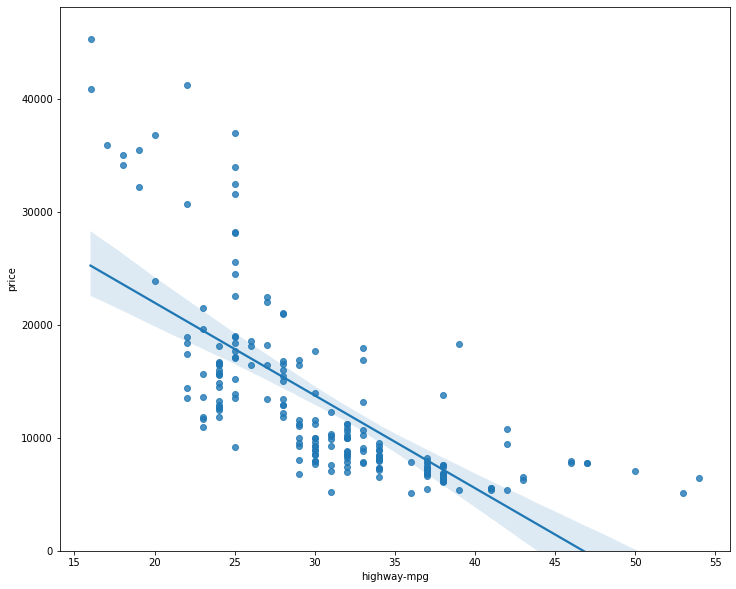

In [23]:
# Horsepower as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.

One thing to keep in mind when looking at a regression plot, is to pay attention to how scattered the data points are around the regression line.  This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not.
If the data is too far off from the line, this linear model might not be the best model for this data.Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

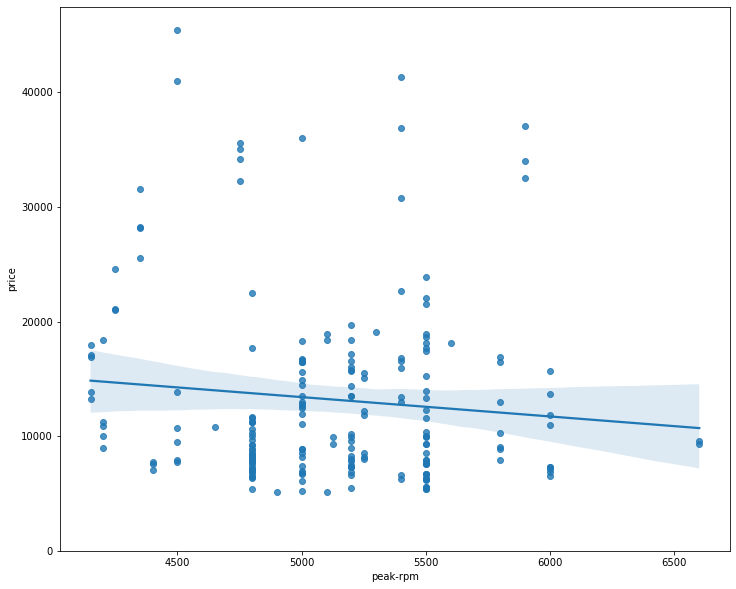

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" We see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm"  have more spread around the predicted line, and it is much harder to determine weather the points are decreasing or increasing as the  "highway-mpg"  increases.

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3: </h1>
<b> Given the regression plots above is "peak-rpm" or "highway-mpg"  more strongly correlated with "price". Use the method  ".corr()"  to verify your answer. </b>
</div>

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">
```
The variable "peak-rpm"  has a stronger correlation with "price", it is approximate -0.704692  compared to   "highway-mpg" which is approximate     -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()
```
</div>

### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a **residual**?

The difference between the observed value (y) and the predicted value (ŷ) is called the residual (e). When we look at a regression plot, the residual is the distance from the datapoint to the fitted regression line.

So what is a **residual plot**?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention at when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are **randomly spread out around the x-axis**, then a **linear model is appriopriate** for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

- If the residuals are **not randomly spread out around the x-axis** and show some other pattern, then a **non-linear model is more appropriate** for the data.

C:\Users\hamdi.jarboui\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


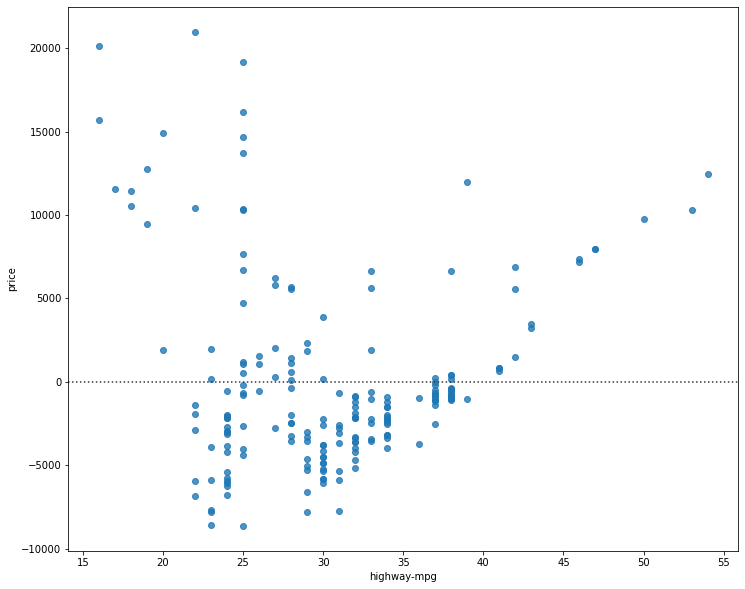

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

*What is this plot telling us?*

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

###  Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? 
This gets a bit more complicated, because you can't visualize it with a regression or residual plot, since there are more than 2 variables at play here.

One way to look at the fit of the model is by looking at the **distribution plot**:
We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [26]:
Y_predict = lm.predict(Z)

C:\Users\hamdi.jarboui\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hamdi.jarboui\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


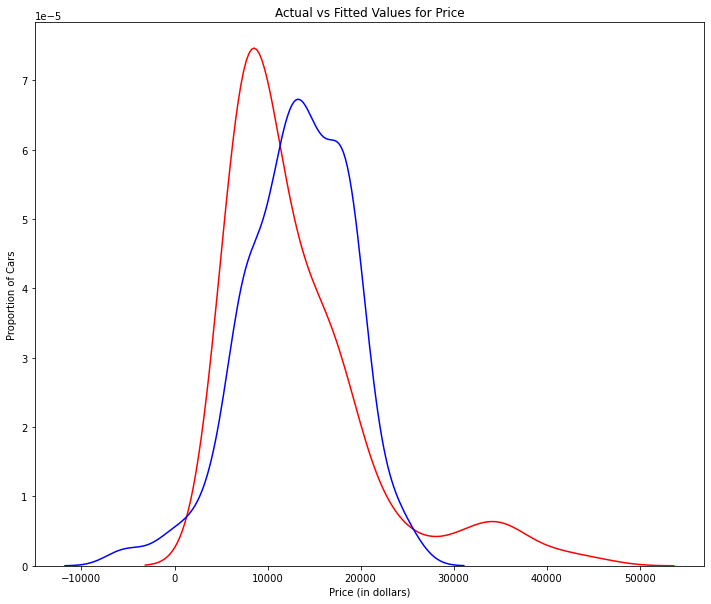

In [27]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Part 3: Polynomial Regression and Pipelines 

**Polynomial regression** is a special case of the general linear regression model or multiple linear regression model. 
We get curvilinear relationships by squaring or setting higher-order terms of the predictor variables.

Polynomial regression is useful for describing curvilinear relationships.

There are different orders of polynomial regressions:
- **Quadratic - 2nd order**:

Y = b0 + b1x + b2x^2

- **Cubic - 3rd order**:

Y = b0 + b1x + b2x^2 + b3x^3

- **Higher order**:

Y = b0 + b1x + b2x^2 + b3x^3 + ....


*Since we saw earlier that perhaps a linear model is not the best fit while using highway-mpg as predictor variable, we can try fitting a polynomial model to this data instead.*

 We will use the following function to plot the data:

In [28]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    # ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

### Get the variables 

In [29]:
x = df['highway-mpg']
y = df['price']

### Calculate polynomial

In [30]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 4)
print(f)
p = np.poly1d(f)
print(p)

[ 2.65088385e-02 -5.17010163e+00  3.81976935e+02 -1.26673852e+04
  1.65673357e+05]
         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


The estimated model we get from this polynomial fit is thus:

**Price** = 1.379e+05 - 8965 x + 204.8 x^2 - 1.557x^3

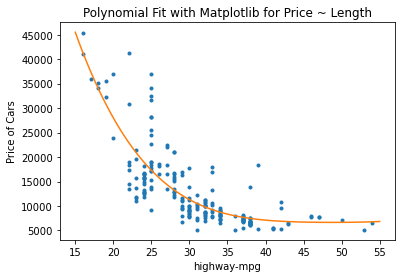

In [31]:
PlotPolly(p,x,y, 'highway-mpg')

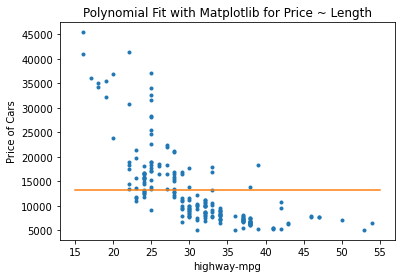

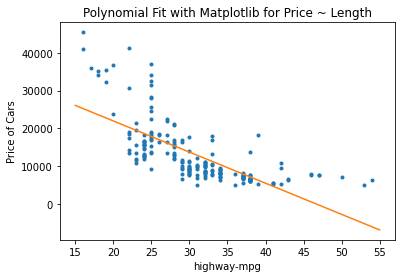

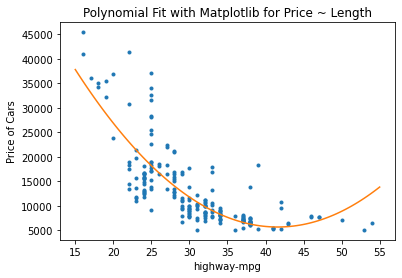

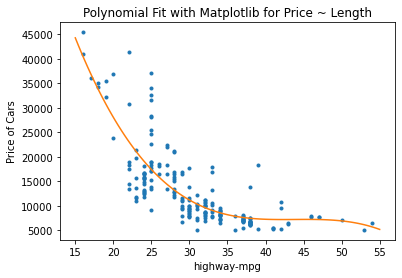

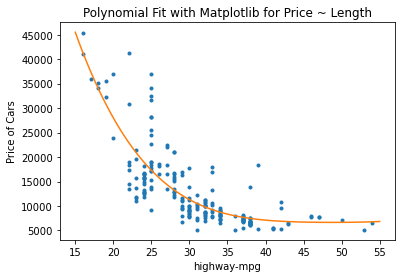

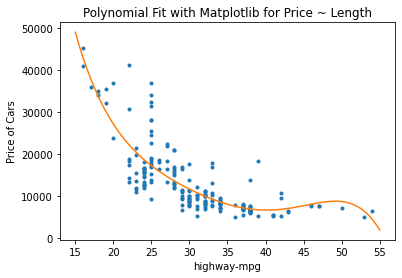

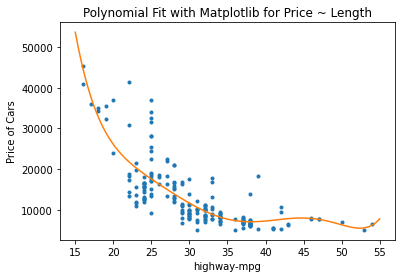

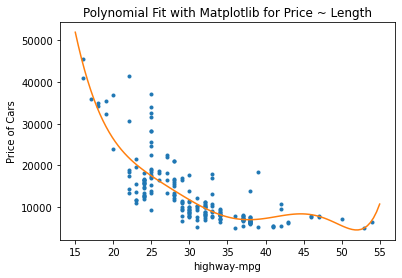

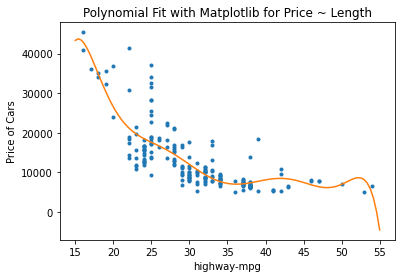

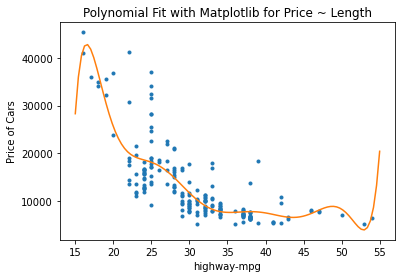

In [32]:
for i in range(10):
    f = np.polyfit(x, y, i)
    p = np.poly1d(f)

    PlotPolly(p,x,y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting this polynomial fit model, that this is a better fit than the linear model, since it goes through the data points better.

The datapoints are closer to the line, which means that the variance is also smaller, so this model would be able to predict the y values more accurately.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>
<b> Create  11 order polynomial model with the variables x and y from above?  </b>
</div>

 <div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q4" class="collapse">
```
# calculate polynomial
# Here we use a polynomial of the 3rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')
```
</div>

 We can perform a polynomial transform  on multiple features, first, we import the  module:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of drgree 2:

In [35]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

#### Z

We perform the polynomial feature transform 

In [36]:
Z_pr=pr.fit_transform(Z)


The original data is of 201 samples and 4 features 

In [37]:
Z.shape

(201, 4)

In [38]:
Z_pr=pr.fit_transform(Z)


after the transformation there 201 samples and 15 features 

## Pipeline 

We can import the Pipeline  and StandardScaler from sklearn

In [39]:
# X1 = df[['highway-mpg']]
# x2 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# x3 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','city-L/100km','diesel', 'gas']]


 We create the pipeline, by creating a list of tuples including the name of the model or estimator and the constructor.

In [40]:
# X3 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','city-L/100km','diesel', 'gas']]

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

NameError: name 'StandardScaler' is not defined

 create a pipe line object 

In [ ]:
pipe=Pipeline(Input)
pipe

We can normalize the data,  perform a transform and fit the model simultaneously. 

In [ ]:
pipe.fit(Z,y)

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

In [ ]:
pipe.score(Z,y)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>
<b>  Create a  pipeline that  Standardize the data, then perform prediction using a linear regression model using the features Z and targets y </b>
</div>

<div align="right">
<a href="#q5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q5" class="collapse">
```
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]
```
</div>

## Part 4: Measures for In-Sample Evaluation

When evaluating the models that we get, not only do we want to visualize the results, but we also want to numerically determine how good this fit is on our data.

Two very important measures that are often used in Statistics to determine the fit of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by the linear model.


**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

### R^2

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)

In [ ]:
# Find the R^2
lm.score(X, Y)

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

### MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable,we will cover this in more depth later in the notebook:

In [ ]:
Yhat=lm.predict(X)
Yhat[0:4]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat)

### Model 2: Multiple Linear Regression

### R^2

In [ ]:
# multi_fit
lm.fit(Z, df['price'])

In [ ]:
# Find the R^2
lm.score(Z, df['price'])

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

### MSE

In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
mean_squared_error(df['price'], Y_predict_multifit)

### Model 3: Polynomial Fit

### R^2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))

In [ ]:
r_squared

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit.

### MSE

In [ ]:
mean_squared_error(df['price'], p(x))

## Part 5: Prediction and Decision Making

### Prediction

Now that we have generated some models, how do we go about predicting values from these models?

As you've seen with the formulas we already used above, for linear regression we tend to use the function:
"lm.predict()"

This function uses the generated linear regression model and allows us to predict the 
- fitted Y values, given the X values that we already have:

Yhat = lm.predict(X)

or
- new Y values, given new X values:

Yhat = lm.predict(X_new)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a  new input 

In [ ]:
new_input=np.arange(1,100,1).reshape(-1,1)

 Fit the model 

In [ ]:
lm.fit(X, Y)

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

plot the data 

In [ ]:
plt.plot(new_input,yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

- *What is a good R-squared value?*

When comparing models, **the model with the higher R-squared value is a better fit** for the data.


- *What is a good MSE?*

When comparing models, **the model with the smallest MSE value is a better fit** for the data.

#### Let's take a look at the values for the different models we get.

Simple Linear Regression: Using Highway-mpg as Predictor Variable of Price.
- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enuff data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2. 

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
 

- **MSE ** 
The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller. 


- **R-squared**: 
In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809). 

This R-squared in combination with the MSE results show that MLR seems like the better model fit in this case, compared to SLR.

### Simple Linear Model (SLR) vs Polynomial Fit

- **MSE**: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR. 

- **R-squared**: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

### Multiple Linear Regression (MLR) vs Polynomial Fit

- **MSE**: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- **R-squared**: The R-squared for the MLR is also much larger than for the Polynomial Fit.

## Conclusion: 

Comparing these three models, we conclude that **the MLR model is the best fit model** to be able to predict price from our dataset.

This makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price. 

### About the Authors:  

This notebook written by [Mahdi Noorian PhD](https://www.linkedin.com/in/mahdi-noorian-58219234/) ,[Joseph Santarcangelo PhD]( https://www.linkedin.com/in/joseph-s-50398b136/), Bahare Talayian, Eric Xiao, Steven Dong, Parizad , Hima Vsudevan and [Fiorella Wenver](https://www.linkedin.com/in/fiorellawever/).
Copyright &copy; 2017 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).

 <div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_bottom"><img src = "https://ibm.box.com/shared/static/cy2mwm7519t4z6dxefjpzgtbpi9p8l7h.png" width = 750, align = "center"></a>
 <h1 align=center><font size = 5> Link</font></h1> 